## HUMBIO51 Assignment Week 7

##  Learning Objectives
***Students should be able to***

### Identify the most enriched motifs in active enhancer regions.  

<ol> 
<li> <a href=#Sort>Use bedtools commands to sort ChiP-seq peak files by genome coordinates.</a></li>
<li> <a href=#Intersect>Use bedtools commands to intersect regions from multiple bed files.</a></li>
<li> <a href=#Dict>Use python dictionaries to generate frequencies of transcription factors in active enhancers.</a></li>
<li> <a href=#Plot>Generate Bar graphs to visualize the most over-represented transcription factors in GM12878.</a></li>
</ol> 

## Question 1: Using k-means analysis to cluster genomic regions by chromatin state 

We have sampled 10000 regions from the human reference genome at random. Each region is 200 base pairs long. At each of these regions, we have data from a CHIP-Seq experiment within the K562 cell line (leukemia cell line)  measuring the strength of 5 histone markers: 
* H3K4me3, 
* H3K4me1, 
* H3K36me3, 
* H3K9me3,
* H3K27me3. 

The data is stored in a file in your Week_7 folder called **region_x_chrom_mark.tsv**

This file contains 200 bp genomic regions along the y-axis and values of "0", "0.5", or "1" for each of the 5 histone marks along the x-axis. 0 indicates that the histone mark is not present, 0.5 indicates a weak presence, and 1 indicates a strong presence. 

In [18]:
#Change your working directory to Week_7
import os
os.chdir('/opt/humbio51/Weekly Assignments/Week_7')

### Question 1a. 
Perform principal component analysis on the data matrix in **region_x_chrom_mark.tsv** using 5 principal components since we have 5 features. Create a scatter plot to visualize PC1 along the x-axis and PC2 along the y-axis.

Hint: refer to the PCA code from class 8.

Hint: We are performing PCA on the genome regions, which are located in the rows of the matrix. Therefore, there is not need to transpose the matrix before running PCA. 

In [19]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
from plotnine import * 

## YOUR CODE HERE ##


/opt/conda/lib/python3.5/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/opt/conda/lib/python3.5/copy.py:292: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = callable(*args)
/opt/conda/lib/python3.5/site-packages/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/opt/conda/lib/python3.5/site-packages/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/opt/conda/lib/python3.5/site-packages/plotnine/facets/layout.py:147: Matp

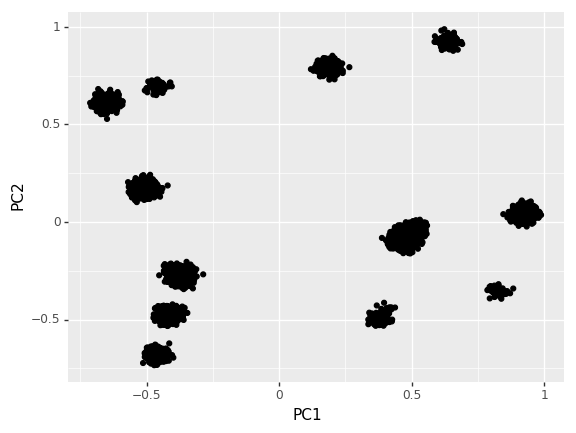

<ggplot: (-9223363263563338608)>

In [20]:
## SOLUTION ## 
region_x_chrom=pd.read_table("region_x_chrom_mark.tsv",header=0,sep='\t')
sklearn_pca = sklearnPCA(n_components=5)
pca_results = sklearn_pca.fit_transform(region_x_chrom)
#We make a scatterplot of PC1 vs PC2 
x=pca_results[:,0]
y=pca_results[:,1]
qplot(x=x,
      y=y,
      geom="point",
      xlab="PC1",
      ylab="PC2")


### Question 1b: 
Looking at the PCA plot, how many clusters would you expect to find in a K-means analysis of this data?

**Your answer here:**  

### Question 1c: 
Use the k-means clustering algorithm implementation from class 9 to cluster the 10,000 genomic regions. Use values of k = 2,4,10,15, 20. 

In [21]:
import sys
sys.path.append('/opt/humbio51/helpers')
from kmeans_helpers import * 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

## YOUR CODE HERE ## 

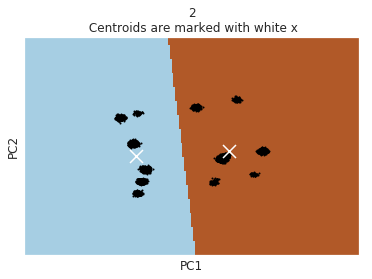

For n_clusters = 2 The average silhouette_score is : 0.6365718796047526


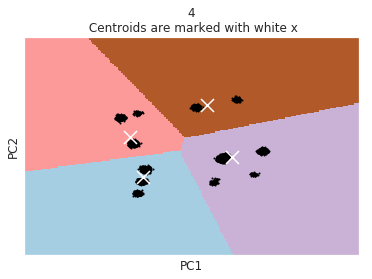

For n_clusters = 4 The average silhouette_score is : 0.747210262322229


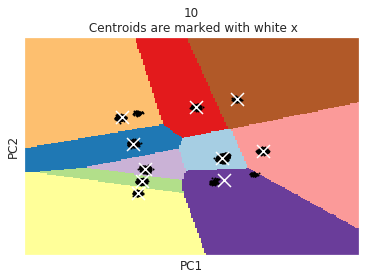

For n_clusters = 10 The average silhouette_score is : 0.8753888946639136


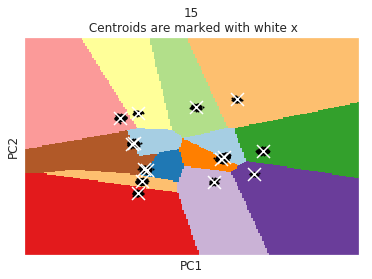

For n_clusters = 15 The average silhouette_score is : 0.5910532541674891


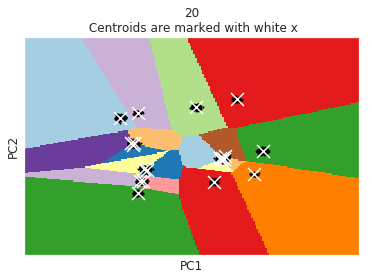

For n_clusters = 20 The average silhouette_score is : 0.46165541369846624


In [22]:
## SOLUTION ## 
for k in [2,4,10,15,20]: 
    clusters=scikit_kmeans(region_x_chrom,
                       k,
                       xlabel='PC1',
                       ylabel='PC2',
                       plottitle=str(k)
                      )

## Question 1d

Which value of K gives the best clustering as measured by the silhouette score ? Is this answer surprising given what you observe in the PCA? Propose an explanation for the discrepancy. 

**ANSWER:**



### Question 1d. 
Store the results of the K-means clustering analysis for the optimal K in a list called **clusters**. 
Use your list **clusters** to plot a bar chart indicating how many genomic regions are assigned to each cluster.

In [34]:
## Generate a variable called clusters to store the output of K-means clustering with the optimal K from the previous question. 


## YOUR CODE HERE ## 

## Generate a bar chart to indicate how many genomic regions are assigned to each cluster. 

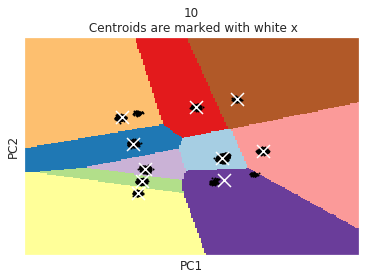

For n_clusters = 10 The average silhouette_score is : 0.8753888946639136


/opt/conda/lib/python3.5/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/opt/conda/lib/python3.5/copy.py:292: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = callable(*args)
/opt/conda/lib/python3.5/site-packages/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/opt/conda/lib/python3.5/site-packages/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  return Bunch(x=xsc, y=ysc)
/opt/conda/lib/python3.5/site-packages/plotnine/facets/layout.p

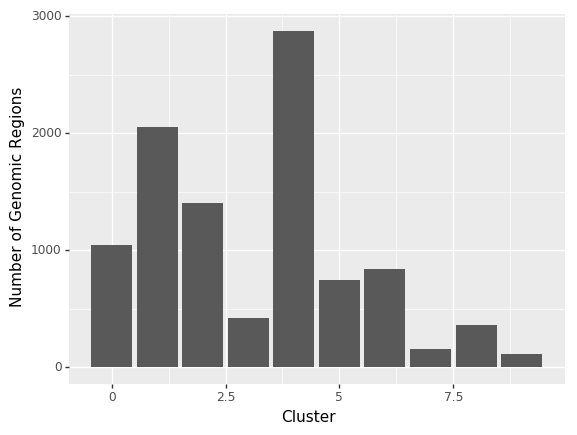

<ggplot: (8773291599003)>

In [35]:
## SOLUTION ## 
k=10
clusters=scikit_kmeans(region_x_chrom,
                       k,
                       xlabel='PC1',
                       ylabel='PC2',
                       plottitle=str(k))
qplot(x=clusters,
      geom="bar",
      xlab="Cluster",
      ylab="Number of Genomic Regions")

### Question 1e. 
Use the function below to plot a heatmap of the clusters.
The x-axis shows the mean of the H3K4me3, H3K4me1, H3K36me3, H3K9me3, and H3K27me3 values for each cluster. The y-axis lists the clusters that you generated. 

In [36]:
import seaborn as sns
def plot_cluster_heatmap(data,clusters,k):
    '''
    k -- the value of k that gave the best clustering of the data. 
    data -- original data frame with genomic regions along the y-axis and histone marks along the x-axis 
    clusters -- list of cluster assignments from K-means clustering. 
    '''
    cluster_summary=None
    for c in range(k): 
        #extract the genomic regions assigned to the current cluster c. 
        cur_subset=data.iloc[np.where(clusters==c)]
        #calculate the mean value for each histone mark in cur_subset 
        mean_histone_vals=np.mean(cur_subset)
        if c==0: 
            cluster_summary=mean_histone_vals 
        else: 
            cluster_summary=pd.concat([cluster_summary,mean_histone_vals],axis=1,ignore_index=True)
    flatui = ["#FFFFFF", "#CCCCCC","#000000"]
    sns.heatmap(cluster_summary.transpose(),annot=False,cmap=sns.color_palette(flatui))

    
## YOUR CODE HERE ##

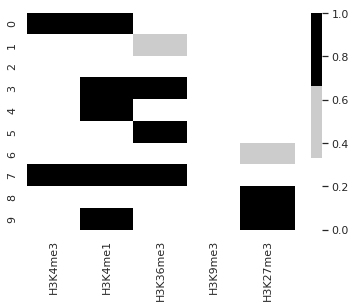

In [37]:
## SOLUTION 
plot_cluster_heatmap(region_x_chrom,clusters,10)

The heatmap shows that each cluster corresponds to a distinct pattern of chromatin histone marks. The ChromHMM project has mapped these combinations of histone marks to the 15 distinct chromatin states included in the annotation file **15_state_chromHMM_annotations.tsv** : 

http://egg2.wustl.edu/roadmap/data/byFileType/chromhmmSegmentations/ChmmModels/coreMarks/jointModel/final/annotationEnrichment_RoadmapEp_coreMarks_15State.png.

Focus on the "Emissions" chart in the top left portion of the table: 


![ChromHMM 15 state Model](../Images/Weekly_HW_6_ChromHMM.png)

### Question 1f.### 
Which cluster maps to which chromatin state? Create a dictionary called "annotation_dict" that maps each cluster id to a ChromHMM annotation state.

Note: you might have more than 1 cluster mapping to a given chromatin state, and not all chromatin states may be used. This is because we are sampling 10,000 random regions from the genome -- it's possible we don't have good representation for some of the chromatin states in this rather small sample.


In [38]:
annotation_dict=dict() 
#For example: 
annotation_dict[0]="Flanking Active TSS"
#Fill in the other cluster - state mappings. 

## YOUR CODE HERE ## 

In [39]:
## SOLUTION ## 
annotation_dict[0]="Flanking Active TSS"
annotation_dict[1]="Weak Transcription"
annotation_dict[2]="Quiescent"
annotation_dict[3]="Genic enhancers"
annotation_dict[4]="Enhancers"
annotation_dict[5]="Strong transcription"
annotation_dict[6]="Weak repressed polycomb"
annotation_dict[7]="Transcription at gene 5' and 3'"
annotation_dict[8]="Repressed Polycomb"
annotation_dict[9]="Bivalent enhancer"



## Question 2

The ENCODE project has aggregated data from multiple transcription factor ChIP-seq experiments performed on the GM12878 lymphoblastoid cell line [(over 150 such experiments)!](https://www.encodeproject.org/search/?type=Experiment&replicates.library.biosample.donor.organism.scientific_name=Homo+sapiens&biosample_type=immortalized+cell+line&organ_slims=blood&assembly=hg19&assay_title=ChIP-seq&biosample_term_name=GM12878&assay_title=ChIP-seq). We have downloaded and merged the peak calls from these experiments in the file **Week_7/GM12878_allTFBS.bed**. This is a standard bed file with columns for 

* Chromosome 
* Start of peak 
* End of peak 
* Name of TF (transcription factor) that binds to this site in the genome. 

Additionally, we have downloaded the ENCODE [active enhancers for the GM12878 cell line.](https://www.encodeproject.org/annotations/ENCSR580CJW/) These were obtained by analyzing H3K27ac ChIP-seq peaks throughout the genome, which are indicative of active enhancer regions. The annotations are stored in the bed file **Week_7/GM12878_enhancer_regions.bed**. 


Your mission is to identify the transcription factor motifs that are most enriched within the GM12878 active enhancer regions. 

### Question 2a


In [40]:
## Examine the format of both files by viewing the first ten lines

## YOUR CODE HERE ##

In [43]:
## SOLUTION ## 

! head -n10 GM12878_allTFBS.bed
! head -n10 GM12878_enhancer_regions.bed

chr1	237564	237934	Runx3
chr1	237593	237953	Ctcf
chr1	237620	237884	Rad21
chr1	237626	237876	Ctcf
chr1	237645	237861	Ctcf
chr1	237651	237855	Ctcf
chr1	237660	237850	Rad21
chr1	237661	237845	Ctcf
chr1	521337	521697	Ctcf
chr1	521430	521680	Ctcf
chr21	44771940	44776681	Distal-Prediction-1	1	.	44772580	44772730	255,205,0
chr1	235140318	235154768	Distal-Prediction-2	1	.	235147700	235147850	255,205,0
chr15	65183074	65188955	Distal-Prediction-3	1	.	65186100	65186390	255,205,0
chr10	42393340	42393490	Distal-Prediction-4	1	.	42393340	42393490	255,205,0
chr12	125256165	125261264	Distal-Prediction-5	1	.	125259220	125259370	255,205,0
chr10	81042355	81047539	Distal-Prediction-6	1	.	81046180	81046330	255,205,0
chr10	125148761	125163701	Distal-Prediction-7	1	.	125151820	125151970	255,205,0
chr22	23268834	23279737	Distal-Prediction-8	1	.	23277860	23278010	255,205,0
chr13	100082683	100089268	Distal-Prediction-9	1	.	100085160	100085310	255,205,0
chr2	85164627	85174450	Distal-Prediction-10	1	.	85166860	8

### Question 2b 
Use bedtools to sort both the Week_7/GM12878_enhancer_regions.bed file and the Week_7/GM12878_allTFBS.bed file.  Store the sorted files as "Week_7/GM12878.enh.sorted.bed" and "Week_7/GM12878.TFBS.sorted.bed" <a name='sort'>

In [41]:
## YOUR CODE HERE ##

In [44]:
## SOLUTION ## 
!bedtools sort -i GM12878_allTFBS.bed > GM12878_allTFBS.sorted.bed
!bedtools sort -i GM12878_enhancer_regions.bed > GM12878_enhancer_regions.sorted.bed

### Question 2c. 
Use bedtools to identify all TF (transcription factor) binding sites that overlap an enhancer region in GM12878. Store these TF binding sites in a file called **Week_7/TFBS.enh.intersection.bed**.  Examine the contents of file Week_7/TFBS.enh.intersection.bed by viewing the first ten lines of the file.

In [42]:
## YOUR CODE HERE ## 

In [45]:
## SOLUTION ## 
! bedtools intersect -a GM12878_allTFBS.sorted.bed -b GM12878_enhancer_regions.sorted.bed > TFBS.enh.intersection.bed
!head -n10 TFBS.enh.intersection.bed

chr1	713716	714280	Pol2
chr1	713756	714672	Pol2
chr1	713756	714672	Pol2
chr1	713763	714510	Pol2
chr1	713802	714192	Pol2
chr1	713833	714433	Cmyc
chr1	713837	714273	Mxi1
chr1	713838	714151	Yy1
chr1	713841	714277	Maz
chr1	713845	714131	Pml


### Question 2d. 
Generate a dictionary called **TF_count_dict** with the following fields:

* Keys are the TF's that bind to enhancer regions within GM12878 (i.e. Pol2, Cmyc, Mxi1, ...) 
* Values are the number of times that each TF appears in a peak -- this is analogous to the number of lines in the file "TFBS.enh.intersection.bed" that contain this TF. 


In [ ]:
## YOUR CODE HERE 
def tally_TF_counts(TF_file_name): 
    #read in the TF_file_name and store the file lines in a list called 'data'
    data=# Your code here 
    tally_dict=dict() 
    #iterate through each line in data, split the string contained in each line by the '\t' delimiter 
    for line in data: 
        tokens=line.split('\t')
        #check whether the 4th value in the list tokens (i.e. the TF that binds this site in the genome) 
        # already exists in tally_dict. 
        #Your code here 
        
        #if it doesn't exist, create an entry for it in tally_dict, with key = TF and value =1 
        #Your code here 
        
        #if it does exist, increment the count for the TF in the dictionary
        #Your code here 
    return tally_dict 


## Execute the function tally_TF_counts on the file that contains the intersection of peaks and known TF binding sites.
## Store the dictionary it returns as TF_count_dict

In [49]:
## SOLUTION ## 
def tally_TF_counts(TF_file_name): 
    #read in the TF_file_name and store the file lines in a list called 'data'
    data=open(TF_file_name,'r').read().strip().split('\n')
    tally_dict=dict() 
    #iterate through each line in data, split the string contained in each line by the '\t' delimiter 
    for line in data: 
        tokens=line.split('\t')
        #check whether the 4th value in the list tokens (i.e. the TF that binds this site in the genome) 
        # already exists in tally_dict. 
        #Your code here 
        if tokens[3] not in tally_dict: 
        #if it doesn't exist, create an entry for it in tally_dict, with key = TF and value =1 
        #Your code here 
            tally_dict[tokens[3]]=1
        else:
        #if it does exist, increment the count for the TF in the dictionary
            tally_dict[tokens[3]]+=1
    return tally_dict 


## Execute the function tally_TF_counts on the file that contains the intersection of peaks and known TF binding sites.
TF_count_dict=tally_TF_counts("TFBS.enh.intersection.bed")

### Question 2c.  
Sort the TF's in your dictionary so the TF from the TF that appears the largest number of times at the top of the file to the TF that appears the smallest number of times at the bottom.  

In [ ]:
##hint: Use the function pandas.DataFrame.from_dict to convert your tally_dict into a pandas data frame, for easier sorting 
## use "help(pd.DataFrame.from_dict) to learn about the inputs and outputs of this function 

## YOUR CODE HERE ##



In [51]:
## SOLUTION ## 
help(pd.DataFrame.from_dict)

Help on method from_dict in module pandas.core.frame:

from_dict(data, orient='columns', dtype=None, columns=None) method of builtins.type instance
    Construct DataFrame from dict of array-like or dicts.
    
    Creates DataFrame object from dictionary by columns or by index
    allowing dtype specification.
    
    Parameters
    ----------
    data : dict
        Of the form {field : array-like} or {field : dict}.
    orient : {'columns', 'index'}, default 'columns'
        The "orientation" of the data. If the keys of the passed dict
        should be the columns of the resulting DataFrame, pass 'columns'
        (default). Otherwise if the keys should be rows, pass 'index'.
    dtype : dtype, default None
        Data type to force, otherwise infer.
    columns : list, default None
        Column labels to use when ``orient='index'``. Raises a ValueError
        if used with ``orient='columns'``.
    
        .. versionadded:: 0.23.0
    
    Returns
    -------
    pandas.Data

In [ ]:
## now, execute the function, passing "TF_count_dict" as the input and setting orient="index" 
## Store the data frame in variable "df"
df=## Your code here 

df.head

In [52]:
## SOLUTION ## 
df=pd.DataFrame.from_dict(TF_count_dict,orient="index")
df.head

<bound method NDFrame.head of                   0
Irf3            338
Tr4             590
Mef2a         12255
Ets1           3847
Ebf1          41045
Usf2           6994
Mta3          10711
Whip          11738
Egr1          13840
Max           11984
Yy1           23158
Jund           1870
Bhlhe40c          1
Brca1           548
Pou2f2        18314
Pu1           18320
Tblr1         12429
Spt20            15
Elf1          19952
Rad21         21125
Nfatc1         7783
Srf            6693
Pol3            204
Foxm1         18243
Znf143         9736
Cebpb          5204
Usf1           6695
Nfya           1754
Nfic          20568
Pbx3           6809
...             ...
Gcn5            150
Runx3         38432
Mef2c          6847
Cmyc           3700
Nfyb           7821
P300b          5293
Tcf12         16369
Stat3          5710
P300          18753
Sp1           16993
Elk1           5363
Zzz3            250
Bhlhe40       11908
Bcl3           9244
Bcl11a        12894
NfkbTnfa      13655
Irf4      

In [ ]:
## Sort the dataframe by column 0 (i.e. this column contains the counts for each TF)
## You may find that the pandas.DataFrame.sort_values function is useful.
## Make sure you sort in *descending* order so that the most common TF's can be found with the head command. 
sorted_df=## Your code here 
sorted_df.head

In [57]:
## SOLUTION ## 
sorted_df=df.sort_values(ascending=False,by=0)
sorted_df.head

<bound method NDFrame.head of               0
Pol2      97718
Ctcf      60674
Ebf1      41045
Runx3     38432
Pax5      33475
Yy1       23158
Rad21     21125
Nfic      20568
Elf1      19952
P300      18753
Pu1       18320
Pou2f2    18314
Atf2      18276
Foxm1     18243
Maz       17463
Sp1       16993
Mxi1      16897
Tcf12     16369
Batf      16022
Pml       15989
Chd2      14735
Taf1      14041
Tbp       14030
Egr1      13840
NfkbTnfa  13655
Irf4      13000
Bcl11a    12894
Tcf3      12767
Tblr1     12429
Mef2a     12255
...         ...
Stat3      5710
Nrf1       5441
Elk1       5363
P300b      5293
Cebpb      5204
Six5       4158
Zeb1       3982
Ets1       3847
Cmyc       3700
Rfx5       3686
E2f4       3279
Nrsf       2862
Cfos       2140
Zbtb33     1878
Jund       1870
Nfya       1754
Rxra       1592
Stat1      1534
Corest     1339
Atf3       1303
Ezh2        688
Nfe2        643
Tr4         590
Brca1       548
Irf3        338
Zzz3        250
Pol3        204
Gcn5        150
Spt20     

### Question 2e. 
What are the five most common transcription factors that bind in GM12878 ? 

**ANSWER:**

### Question 3e: 
Generate a bar graph representing the frequency of the 30 most common TF's. The x-axis should contain the name of the TF, and the y-axis should contain the number of times it occurs within an active enhancer in GM12878. 

In [69]:
## hint: You can use the .index function to obtain the TF names from the sorted_df data frame.

## hint: by default, the geom="bar" argument to qplot generates a histogram. To make it generate a bar graph with 
## pre-specified x and y values, add the argument stat="identity" to the qplot function. 

## hint: you might need to flip the x and y coordinates to make the bar graph axis labels legible

## YOUR CODE HERE ##


/opt/conda/lib/python3.5/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/opt/conda/lib/python3.5/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/opt/conda/lib/python3.5/copy.py:292: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = callable(*args)
/opt/conda/lib/python3.5/copy.py:292: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = callable(*args)
/opt/conda/lib/python3.5/site-packages/plotnine/facets/facet.py:151:

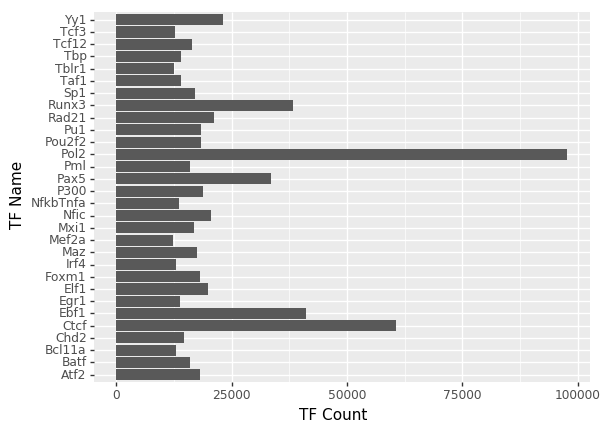

<ggplot: (8773291526422)>

In [68]:
## SOLUTION ## 
common_tfs=sorted_df.iloc[0:30]
tf_names=common_tfs.index
tf_counts=common_tfs[0]

qplot(x=tf_names,
      y=tf_counts,
      geom="bar",
      stat="identity",
      xlab="TF Name",
      ylab="TF Count"      
     )+coord_flip()
